## Student: Rodolfo Lerma

# Introduction to Generative Adversarial Networks

## Machine Learning 530

### Stephen Elston

## Overview

**Generative models** generate outputs that attempt to simulate the characteristics of some actual data cases. In more technical terms, a generative model learns a distribution $\mathbb{P}_g$ which is close to the distribution of real data $\mathbb{P}_r$. Generative models are generally used for the generation of images, text, speech. However, other types of data can be tackled. 

In most cases, generative models use unsupervised learning. The generative model learns from the data samples provided rather than labeled cases.      

Generative models are an active area of research and there is active research on several approaches. In this lesson we are focused on the approach which currently seems the most promising. Other interesting generative models include [pixelRNN](https://arxiv.org/pdf/1606.05328.pdf), [pixelCNN](https://arxiv.org/pdf/1601.06759.pdf) and [variational autoencoders](https://arxiv.org/pdf/1606.05908.pdf). All three of these approaches attempt to model explicit probability densities. 

**Generative adversarial networks**, or **GANs**, are a sophisticated deep learning architectures which **generate** new data cases. At present, GANs appear to produce the best results for a variety of problems and are our focus in this lesson. The **data generator** is a deep neural network trained using an **adversarial** algorithm to fool the discriminator. The **discriminator** is another deep neural network which tries to learn the difference between the real data cases and the generated data cases. Both the generator and discriminator are trained using **sampled data**. Thus, the **probability distributions are implicit**. The use of a sampled or implicit distribution is in contrast to most other generative models.   

GANs are inspired by game theory. The generator and the discriminator work in opposition to each other. This opposition leads to the use of the term "adversarial". As training progresses the generator tries to fool the discriminator. Whereas, the discriminator learns to determine if the image is real or created by the generator. Our goal with this game is to find an equilibrium where the there neither the discriminator or generator can reasonably improve. However, as you will see, achieving this goal can be difficult. 

GANs have proven useful for several purposes. 
- First, GANs can be used to train a deep learning model to resist adversarial or malicious attacks. Using a GAN training cases can be created that are nearly the same as legitimate cases, and which might be used by an adversary to stage an attack on an intelligent system. 
- Second, GANs can be used to create training cases which fill 'holes' in the space of real-data training cases. This application is significant since in many real-world situations there are no enough real-data training cases to effectively train deep neural networks. Synthetic data create using GANs can augment the real-data cases, allowing effective training. 

GANs can be used to generate, primarily unstructured, synthetic data of many different types. In this lesson we will focus on image data, a common use case. 

You can find a general discussion of generative models and how GANs fit into the universe of algorithms in [Goodfellow's 2016 NIPS Tutorial: Generative Adversarial Networks](https://arxiv.org/pdf/1701.00160.pdf).

## GAN Architecture

The basic architecture of a GAN is shown in the figure below. Specifically, this figure shows a GAN using the MNIST handwritten digits. However, there is no reason that other types of data could not be used.   

<img src="img/GANArchitecture.JPG" alt="Drawing" style="width:600px; height:300px"/>
<center>**Figure 1.1. Basic architecture of a generative adversarial network**</center>

The key components of this architecture are: 
1. A source of actual or true data cases, used to train the discriminator. In the example we consider in this lesson we are using the MNIST hand written digits.  
2. Random noise, used as the input to the generator.
3. The generator computes cases. 
3. The generator is trained using the 
2. The discriminator uses the real data cases to . 

## A Bit of Game Theory 

You can think of a GAN as a game between a **player** (the discriminator) and an **adversary** (the generator). More specifically, a GAN is a two player **adversarial game** or **non-cooperative game**. One player, the generator, learns an optimal strategy to deceive its opponent, the discriminator. The other player, the discriminator, learns to determine if the case presented by its opponent, the generator, is real or fake. 

We can understand the game to train the GAN as a competition between the discriminator and the generator. This game is illustrated in the figure below. 

<img src="img/min-max.JPG" alt="Drawing" style="width:400px; height:300px"/>
<center>**Figure 1.2. Generator and discriminator training in opposition**</center>

On the left side of the diagram illustrates the training of the discriminator on real data. The discriminator attempts to learn to correctly identify real data. On the right side of the diagram the discriminator and generator are trained in a non-cooperative game. The discriminator attempts to correctly recognize the generated data and the generator attempts to fool the discriminator.    

### Nash equilibrium

A two-player non-cooperative game proceeds until **Nash equilibrium** is achieved. At Nash equilibrium neither player changes its strategy regardless of what the other player does.  

A simple version of the non-cooperative game for training a GAN is a **zero-sum game**. The sum of the all players costs remain 0. Let $J^{(D)}$ be the cost for the discriminator and $J^{(G)}$ be the cost for the generator, then: 

$$J^{(D)} = -J^{(G)}$$  

We can define a value function, $V(\theta_d, \theta_g)$, of the discriminator's payoff for the game as:

$$V(\theta_d, \theta_g) = - J^{(D)}(\theta_d, \theta_g)$$

Mathematically we can express Nash equilibrium as a **mini-max** relationship. Let D(x) be the discriminator function and G(z) the generator function. The value of the game, $V(D,G)$, at equilibrium can be expressed as: 

\begin{align}
{min \atop G} {max \atop D} V(\theta_d,\theta_g)  = E_{x \sim p_{r}(x)}[log(D_{\theta_d}(x))] + E_{z \sim p_g(z)}[log(1 - D(G_{\theta_g}(z)))] \\
= E_{x \sim p_{r}(x)}[log(D_{\theta_d}(x))] + E_{x \sim p_g(x)}[log(1 - D(x_{\theta_g}))]
\end{align}

Where at equilibrium,  
- $p_{r}(x)$ is the distribution over the real data, $x$,     
- $p_g(z)$ is the distribution of the generator over the latent variable $z$,  
- the discriminator maximizes $log(D(x))$, its ability to differentiate real data from generated samples,  
- the quantity $log(1 - D(G(z)))$ is minimized, which can also be interpreted as maximizing the distribution of the discriminator given the generator, $D(G(z))$. 


### Stability of Nash equilibrium

A surprising property of Nash equilibrium is that it does not imply stability. To understand how this can be, let's look at an example. Say that the value functions for the two players, $\{ 1, 2 \}$, are:

$$
\begin{align}
f_1(x) = -xy \\ 
f_2(y) = xy
\end{align}
$$

Since this game has reached Nash equilibrium, neither of these functions will change. 

To continue to 'play' this game, we need the partial derivatives of the functions:

$$
\begin{align}
\frac{\partial f_1}{\partial x} = -y \\
\frac{\partial f_2}{\partial y} = x
\end{align}
$$

We can now simulate this equilibrium over a number of time steps. The code in the cell below simulates this equilibrium for a number of time steps. Execute the code and examine the results. 

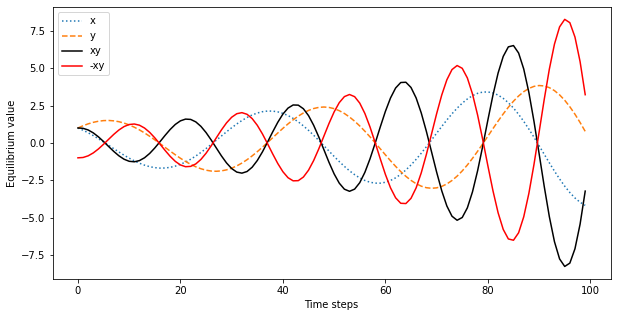

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy.random as nr

nsteps = 99
alpha = 0.15 # the learning rate
x =[]
y = []
xy = []
minus_xy = []

## set inital values
x.append(1.0) 
y.append(1.0) 
xy.append(1.0)
minus_xy.append(-1.0)

## Simulate over time steps
for i in range(nsteps):
    x.append(x[i] - alpha*y[i])
    y.append(y[i] + alpha*x[i])
    xy.append(x[i+1] * y[i+1])
    minus_xy.append(-x[i+1] * y[i+1])

## Plot the two distributions 
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, linestyle='dotted', label='x')  
ax.plot(y, linestyle='dashed', label='y')
ax.plot(xy, 'black', label='xy')
ax.plot(minus_xy, 'r', label='-xy')
ax.set_xlabel('Time steps')
ax.set_ylabel('Equilibrium value')
ax.legend(loc = 2)

> **Exercise 7-1:** You can see that Nash equilibrium does not guarantee stability. Examine the result above and answer the following questions in one or two sentances. 
> 1. Are the values of x and y both increasing with time step, and if so, what does this tell you about boundedness (or lack thereof) for functions, $f_1(x)$ and $f_2(x)$? 
> 2. From the values of $x$, $y$, $f_1(x)$ and $f_2(x)$ shown in the plot, is this a zero-sum game and why? 

> **Answers:**   
> 1. We can see that both x & y increase with time, which tells us that $f_1(x) = xy$ and $f_2(x) = -xy$  will increase indefinitely and is not bounded.
> 2.  Yes, it is zero-sum game, which is possible to see directly from the 2 functions ($f_1(x) = xy$ and $f_2(x) = -xy$) when one is up the other is down even when x & y are changing (Nash Equilibrium).

### Gradients

To train the discriminator and generator models we will need the gradient of the min-max loss function. 

The discriminator function, $D(x)$, is parameterized by a vector $\theta_d$. The gradient of the loss function for the discriminator is then:

$$\nabla_{\theta_d} \frac{1}{m} \sum_{i=1}^m \big[ log(D(x^{(i)}) + log(1 - D(G(z^{(i)}))) \big]$$

Similarly, we parameterize the generator function, $G(z)$, by a vector $\theta_g$. The gradient of the loss function for the generator then becomes:

$$- \nabla_{\theta_g} \frac{1}{m} \sum_{i=1}^m \big[ log(1 - D(G(z^{(i)}))) \big] \\
= \nabla_{\theta_g} \frac{1}{m} \sum_{i=1}^m \big[ log( D(G(z^{(i)}))) \big]$$

You may wonder which form of this gradient is best to use. The question is, which form has the stongest gradient which the divergence approaches 0. The figure below should explian the difference in the gradients of the two forms. 

<img src="img/Gradients.JPG" alt="Drawing" style="width:400px; height:225px"/>
<center>**Figure 1.2. Gradients for training the generator**</center>

> **Exercise 7-2:** Examine the plot of the gradients for the generator and discriminator. Given that the Nash equilibrium will be at $D(G(z)) = 0$, what can you say about the gradients of the discriminator and the generator at convergence? 
> Which model given will have difficulty converging, given the gradients of the loss functions $\mathbb{E}_z \big[ log(1 - D(G(z^{(i)}))) \big]$ and $\mathbb{E}_z \big[ log( D(G(z^{(i)}))) \big]$.  

> **Answer:**     
It seems $\mathbb{E}_z \big[ log(1 - D(G(z^{(i)}))) \big]$ is almost flat near zero, or in other words it has almost zero gradient near 0 Divergence which in turn might create problems for convergence.
As for $\mathbb{E}_z \big[ log( D(G(z^{(i)}))) \big]$ we can see that has it maximum value at Nash Equilibrium.

### Mode collapse 

A pitfall with training a GAN using the gradient is known as **mode collapse**. While total model collapse is rare, partial mode collapse appears to be common.   
To understand how mode collapse arises consider the following extreme case. The generator, $G(z)$, is trained without updating the discriminator, $D(x)$. The generated images $x^*$ converge to those that fool $D(x)$. This makes $x^*$ independent of $z$, since:

$$x^* = argmax_x D(x)$$

This case causes model collapse to a **single point**. Now, the gradient with respect to $z$ of the loss function becomes:

$$\frac{\partial J}{\partial z} \rightarrow 0$$

How can you get a feel for what this really means? The figure below illustrates a similified, but rather extreme, example.  

<img src="img/ModeCollapse.JPG" alt="Drawing" style="width:600px; height:400px"/>
<center>**Figure 1.2. Generator and discriminator training in opposition**</center>

Referring to the figure above a generator and discriminator are trained in opposition. The generator creates samples with a high probability of Mode Collapse, for $p = 0.5$. the steps of training the generator and discriminator are:
0. The real data has two strong and well separated modes, shown in blue and red.
1. In the first step in training, the generator perfectly learns one mode of the data. 
2. The discriminator learns that all samples in one mode are real data, but that samples in the other mode are real with $p = 0.5$.
3. The generator now learns that it can fool the discriminator perfectly by generating samples from the other mode. 
4. Next the discriminator learns that samples from the first node are always real data, but samples from the other node are real with $p = 0.5$.

As you can see, the mode collapse process illustrated can continue indefinitely. The training will never converge to a stable solution. Notice also, that this process is not a Nash equilibrium since each player is changing its strategy in response to the other. 

While training a real-world GAN the type of complete mode collapse illustrated in the simple example is unlikely. However, **partial node collapse** is often seen. This situation prevents convergence when training the GAN.  


## Measures of Divergence

To train GANs we need a measure of the **divergence** between two distributions for two reasons:   
- Determine how close the output distribution of the generator is to the real data.
- Measure how well the discriminator tells the difference between real data and generated data.    

One of the reasons GAN performance has improved dramatically in recent years is application of different measures of divergence. The introduction of the **Wasserstein GAN** or **WGAN** in a [paper by Arjovsky et. al.](https://arxiv.org/pdf/1701.07875.pdf) in 2017 proved to be a significant improvement. We will summarize the key points of this paper here. If you are mathematically inclined you may wish to read the original paper. GANs are an active area of research and it is entirely possible that the state of the art has advanced. 

A significant problem in applying a measure of divergence arises from the fact that GANs learn **low dimensional function approximations** of the data probability distributions. To understand this concept, consider a gray scale image with dimensions of 1000x1000. The distribution of values has a dimensionality of  1000,000. However, the pixel values are spatially correlated so the effective dimensionality is considerably lower. Thus, a good function approximation can have lower dimensionality. In mathematical terms, we call this **manifold learning**. In simple terms, a manifold is lower dimensional surface in a high dimensional space.   

The use of low dimensional function approximation or manifold learning means that that there will likely not be complete overlap when comparing two distributions. As you will see this situation can lead to significant problems for leaning the distributions for the discriminator and generator.   

### Kulback-Leibler divergence

The **Kulback-Leibler divergence** or **KL divergence** is widely used in deep learning. The well known cross entropy loss function is derived by minimizing KL divergence between data and a model being learned of the data. This approach has been quite successful in many situation. 

Let's review the basic idea. KL divergence measures the difference between two distributions. For a GAN we wish to compare $p_r(x)$ and $p_g(x)$:

$$KL(\mathbb{P}_r \parallel \mathbb{P}_g) = \int log \Big( \frac{p_r(x)}{p_g(x)} \Big) p_r(x) du(x)$$

When $p_r(x) = p_g(x)$ then $KL = 1$. As $p_g(x)$ diverges from $p_r(x)$ the $KL \lt 1$. 

Unfortunately, there are two primary reasons why KL divergence does not work well for GANs. 
- KL divergence is asymmetric between the two distributions evaluated. The result of this asymmetry is that the gradient used to learn the distributions is also asymmetric, which often inhibits learning. This asymmetry can be scene in the following inequality:

$$KL(\mathbb{P}_r \parallel \mathbb{P}_g) \ne KL(\mathbb{P}_g \parallel \mathbb{P}_r)$$


- KL divergence is not defined in cases where the manifolds of the distributions do not overlap. This leads to discontinuities in the gradient and difficulty learning the distributions. Consider what happens when $p_g(x) = 0$, but $p_r(x) \gt 0$. In this case $KL(p_r(x) \parallel 0) = \infty$.



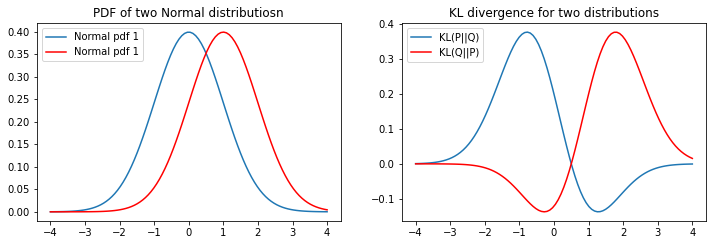

In [2]:
from scipy.stats import norm
import math

## Compute the pdf of the two distributions
sd = 1.0
mu1 = 0.0
mu2 = 1.0 
x = np.linspace(-4.0, 4.0, 100)
normal1 = norm.pdf(x, loc = mu1, scale = sd)
normal2 = norm.pdf(x, loc = mu2, scale = sd)

## Plot the two distributions 
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.plot(x, normal1, label='Normal pdf 1')
ax1.plot(x, normal2, 'r', label='Normal pdf 1')
ax1.set_title('PDF of two Normal distributiosn')
ax1.legend(loc = 'upper left')

## Compute and plot the KL divergence for the two distribution for 
## both possible comparisons.
klPQ = [n1 * math.log(n1/n2) for n1, n2 in zip(normal1, normal2)]
klQP = [n2 * math.log(n2/n1) for n1, n2 in zip(normal1, normal2)]
ax2.plot(x, klPQ, label ='KL(P||Q)')
ax2.plot(x, klQP, 'r', label = 'KL(Q||P)')
ax2.set_title('KL divergence for two distributions')
ax2.legend(loc = 'upper left')

### Jensen-Shannon divergence

The **Jensen-Shannon divergence** or **JS divergence** is a symmetric measure of the divergence between two distributions. We can express the JS divergence as follows:

$$JS(\mathbb{P}_r, \mathbb{P}_g) = \frac{1}{2} KL(\mathbb{P}_r \parallel \mathbb{P}_m) + \frac{1}{2} KL(\mathbb{P}_g \parallel \mathbb{P}_m)$$

where,
$$\mathbb{P}_m = \frac{\mathbb{P}_r + \mathbb{P}_g}{2}$$

The JS divergence has improved behavior when compared to KL divergence. This improvement arises from comparing the mean divergence between the two distributions and the average of the two distributions, $\mathbb{P}_m$. Specifically, this makes JS divergence symmetric since:

$$JS(\mathbb{P}_r, \mathbb{P}_g) = JS(\mathbb{P}_g, \mathbb{P}_r)$$

The code in the cell below computes the JS divergence for the same pair of Normal density functions and plots the result. Execute this code and examine the result. 

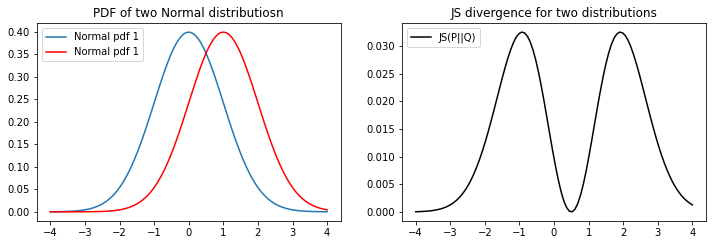

In [3]:
## Function to compute JS divergence
def df_divergence(pdf1, pdf2):
    pm = [0.5 * (p1 + p2) for p1,p2 in zip(pdf1,pdf2)]
    js = [0.5 * n1 * math.log(n1/p) + 0.5 * n2 * math.log(n2/p) for n1, n2, p in zip(pdf1, pdf2, pm)]
    return(js)

## Plot the two distributions 
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.plot(x, normal1, label='Normal pdf 1')
ax1.plot(x, normal2, 'r', label='Normal pdf 1')
ax1.set_title('PDF of two Normal distributiosn')
ax1.legend(loc = 'upper left')

## Compute and plot the JS divergence for the two distributions
klPQ = [n1 * math.log(n1/n2) for n1, n2 in zip(normal1, normal2)]
klQP = [n2 * math.log(n2/n1) for n1, n2 in zip(normal1, normal2)]
ax2.plot(x, df_divergence(normal1, normal2), 'black', label ='JS(P||Q)')
ax2.set_title('JS divergence for two distributions')
ax2.legend(loc = 'upper left')

You can see that the JS divergence is symmetric. The introduction of a symmetric measure of divergence was a significant step forward in the performance of GANs. 

However, JS divergence can still suffer from discontinuities in a similar manner to KL divergence. For example, consider what happens if the density of one of the distributions is zero. Say, $\mathbb{P_r} = 0$, then:

$$\mathbb{P}_m = \frac{\mathbb{P_r} + \mathbb{P_g}}{2} = \frac{0 + \mathbb{P_g}}{2} = \frac{\mathbb{P_g}}{2}$$

We then compute the KL divergence as:

\begin{align}
JS(0, \mathbb{P}_g) = \frac{1}{2} KL(0 \parallel \mathbb{P}_g) + \frac{1}{2} KL(\mathbb{P}_g \parallel \mathbb{P}_g) = \infty
\end{align}

The result is a discontinuity in the gradient which prevents convergence while training the models. 

### Wasserstein divergence

The **Wasserstein distance** or **Earth-Mover distance** uses a very different approach to measure the difference between two distributions.  The Wasserstein distance is defined mathematically as:

$$W(\mathbb{P}_r,\mathbb{P}_g) = {inf \atop \gamma \in \Pi(\mathbb{P}_r,\mathbb{P}_g)} \mathbb{E}_{(x,y) \sim \gamma} \big[ \parallel x - y \parallel \big]$$

where, 
- $inf$ is the **infinum** which is the greatest lower bound of the values, a stricter minimum criteria,
- $\Pi(\mathbb{P}_r,\mathbb{P}_g)$ is the set of all joint distributions $\gamma(xy)$ with marginal distributions $\mathbb{P}_r$ and $\mathbb{P}_g$. As we will explain shortly, the "mass" of moves from x to y to move $\mathbb{P}_g$ to $\mathbb{P}_r$. The marginal distributions $\mathbb{P}_r$ and $\mathbb{P}_g$ are computed as follows:

$$
\begin{align}
\mathbb{P}_r = \sum_{y} \gamma(x,y)\\
\mathbb{P}_g = \sum_{x} \gamma(x,y)
\end{align}
$$

The foregoing seems rather abstract. Further, the Wasserstein distance is quite different from the distance norms you may be used to. The figure below should help you develop some intuition.   

<img src="img/Wasserstein.JPG" alt="Drawing" style="width:600px; height:300px"/>
<center>**Figure 1.1. Example of Wasserstein divergence**</center>

The Wasserstein distance is often called the **earthmover distance**. In the example illustrated, there are two distributions, $Q(x)$ and $P(x)$, representing piles of dirt. The vertical scale represents bulldozer loads of dirt. The bulldozer must move the dirt in distribution $Q(x)$ so that it matches distribution $P(x)$. The Wasserstein distance between $Q(x)$ and $P(x)$ is the minimum, or infinum, of bulldozer loads required to do this. The loads moved by the bulldozer are illustrated:
0. The initial distributions of $Q(x)$ and $P(x)$.
1. A single bulldozer load is moved from $x = 4$ to $x = 3$.
2. One bulldozer load is moved from $x = 1$ to $x = 3$.
4. One bulldozer load is moved from $x = 1$ to $x = 3$.

In summary, 5 bulldozer loads of dirt must be moved to make $Q(x) = P(x)$. Thus, the Wasserstein distance between $Q(x)$ and $P(x)$ is 5. 

It turns out that the above formulation of Wasserstein distance is hard to work with in practice. An alternative formulation cab be derived, and is shown below:

$$W(\mathbb{P}_r,\mathbb{P}_g) = {sup \atop \parallel f \parallel_L \le 1} \mathbb{E}_{x \sim \mathbb{P}_r} [f(x)] - \mathbb{E}_{x \sim \mathbb{P}_g} [f(x)]$$

where, 
- $sup$ is the **supremum** or least upper bound, a stricter maximum criteria,
- $\parallel f \parallel_L \le 1$ indicates the **1-Lipschitz continuity condition**. The exact definition of the 1-Lipschitz continuity condition is rather technical. The key point for our purposes here is that any 1-Lipschitz continuous function also has continuous derivatives. This is most useful when computing the gradient.  

The forgoing formulation might help create a usable loss function. We can do better by averaging across all $(x,y)$ pairs, by noticing that:

$$\sum_{x,y} \gamma(x,y) \parallel x - y \parallel = \mathbb{E}_{x,y \sim} \sum_{y} \gamma(x,y)  \parallel x - y \parallel$$

The minimum of the above is the infinum of the, which is the Wasserstein distance. 

> **Exercise 7-3:** Comparing the gradient properties of Wasserstein loss to those of KL-divergence, in a few sentences why does this difference in behavior make Wasserstein loss a better choice?  

> **Answer:**     

## GAN Example

Before continuing, you will need to establish a Google Colab account. If you do not have an account you can sign up on [this page](https://colab.research.google.com/signup). A free account will be adequate for this lab. 

------------------
> **Note:** If you do not wish to run the notebook in Colab, you can download the example notebook and run it in another environment. Depending on the environment, doing so may require minor changes in the notebooks. 
------------------

#### Starting and running the notebook

You will now start and execute a Jupyter notebook containing a Keras condition GAN example. Go to [this page](https://keras.io/examples/generative/conditional_gan/), and click **View in Colab**. Once the notebook launches in Colab read the provided commentary and examine the code for each cell. Then, execute the code all the cells in order. The model will be trained for over 1000 epochs, with each epoch requiring considerable computing time. If the notebook times out on Colab, you can find the code to answer the questions in the description on the web page.    

> **Note:** For this assignment, you are required to submit this notebook with the exercises complete along with the executed notebook from Colab. To submit your executed notebook you must use File -> Download -> Download .ipynb. You can then upload your notebook into Canvas.  

> **Note:** You can find a good example of a deep convolutional GAN (DCGAN) [here](https://www.tensorflow.org/tutorials/generative/dcgan). 

> **Exercise 7-4:**  Examine the code for the `discriminator` function, which is mostly as standard convolutional neural network. Based on your examination of this code, and provide short answers for the following questions:     
> 1. Based on the output layer, what is data type is output of the discriminator?     
> 2. Why is this output type correct for a discriminator?    
> 3. What value will the output of the discriminator converge toward as the GAN training converges?    

> **Answers:**  
> 1.     
> 2.      
> 3.     

> **Exercise 7-5:** Examine the code for the `generator` function. Based on your examination of this code, and provide short answers for the following questions:     
> 1. What is the shape and values of the input to the generator? You are not being asked for numeric values of the shape.       
> 2. What shape is the output from the discriminator and why is this correct?  You are not being asked for numeric values of the shape.   

> **Answers:**  
> 1.          
> 2.     

> **Exercise 7-6:** The Examine the code of the `train_step` method of the `ConditionalGAN` class. Instances of this class are the conditional GAN models. Answer the following questions: 
> 1. The `random_vector_label` is created by the code following the code comment 'Sample random points in the latent space and concatenate the labels'. What are the two components of the generator input vector, and what are the values used for these two components?   
> 2. Referring the feature vector referred to the foregoing question, how do the components relate to the conditioning of the distribution of the generated images?     
> 3. Following the comment 'Decode the noise (guided by labels) to fake images' fake images are generated with the generator. In the following two code blocks the real and fake images and corresponding labels are concatenated into feature and label vectors for the discriminator. By examining the following block of code following the `Train the discriminator` comment, in a few sentences explain how the loss is computed. **Hints:** i) The loss function is defined when the model is trained. ii) The `labels` values are real vs. fake, not the category of the images.    
> 4. Examine the code block following the comment staring `Train the generator`. In a few sentences, explain how the loss is computed. **Hints:** i) The loss function is defined when the model is trained. ii) Be careful about the different labels used. 

> **Answers:**   
> 1.     
> 2.          
> 3.     
> 4.    

### Copyright 2019, 2022, Stephen F Elston. All rights reserved. 